In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad

In [10]:
plt.style.use('seaborn-notebook')

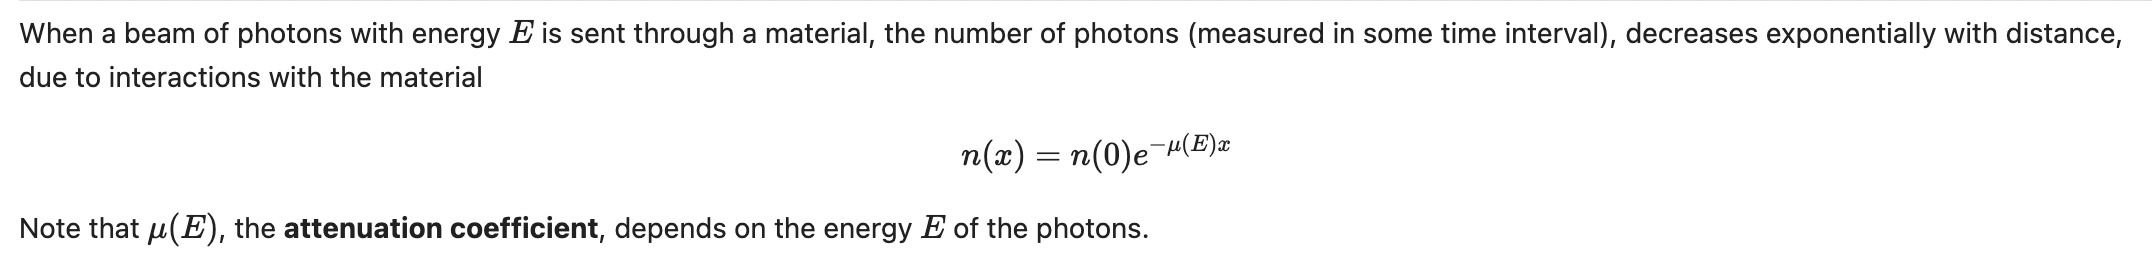

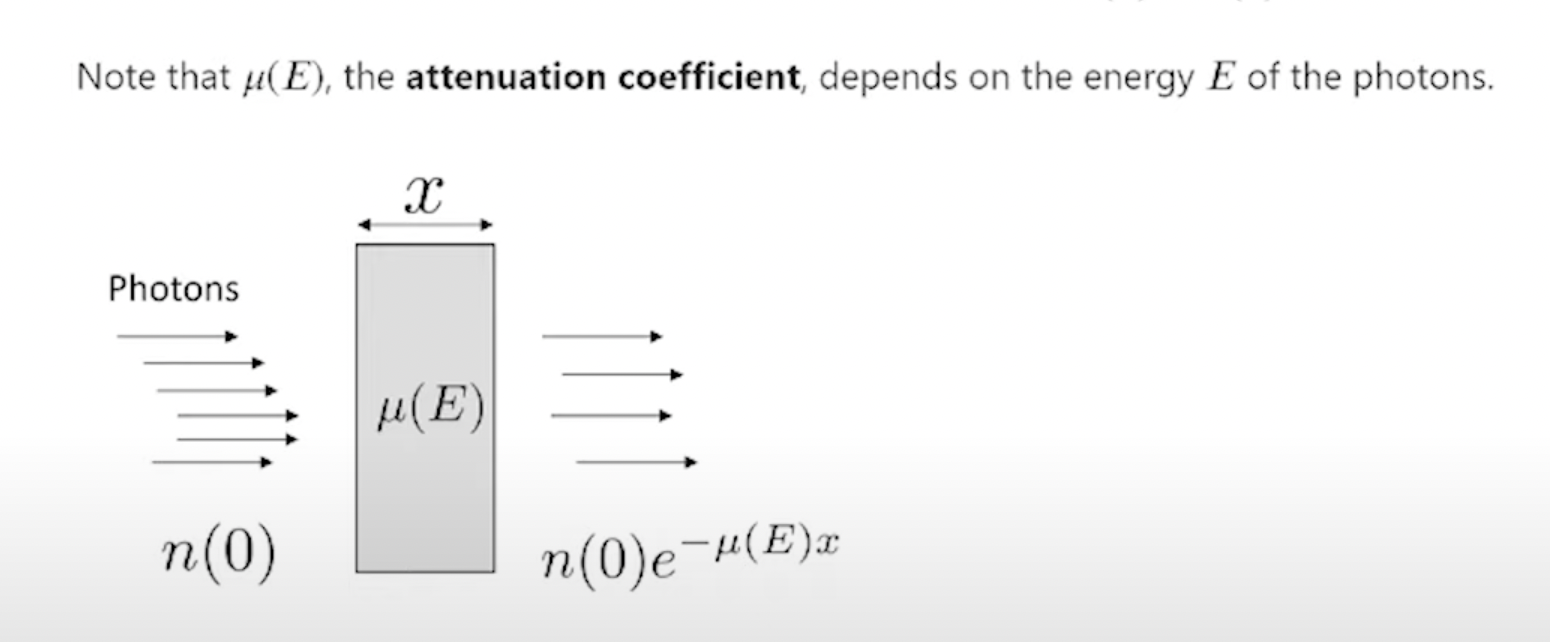

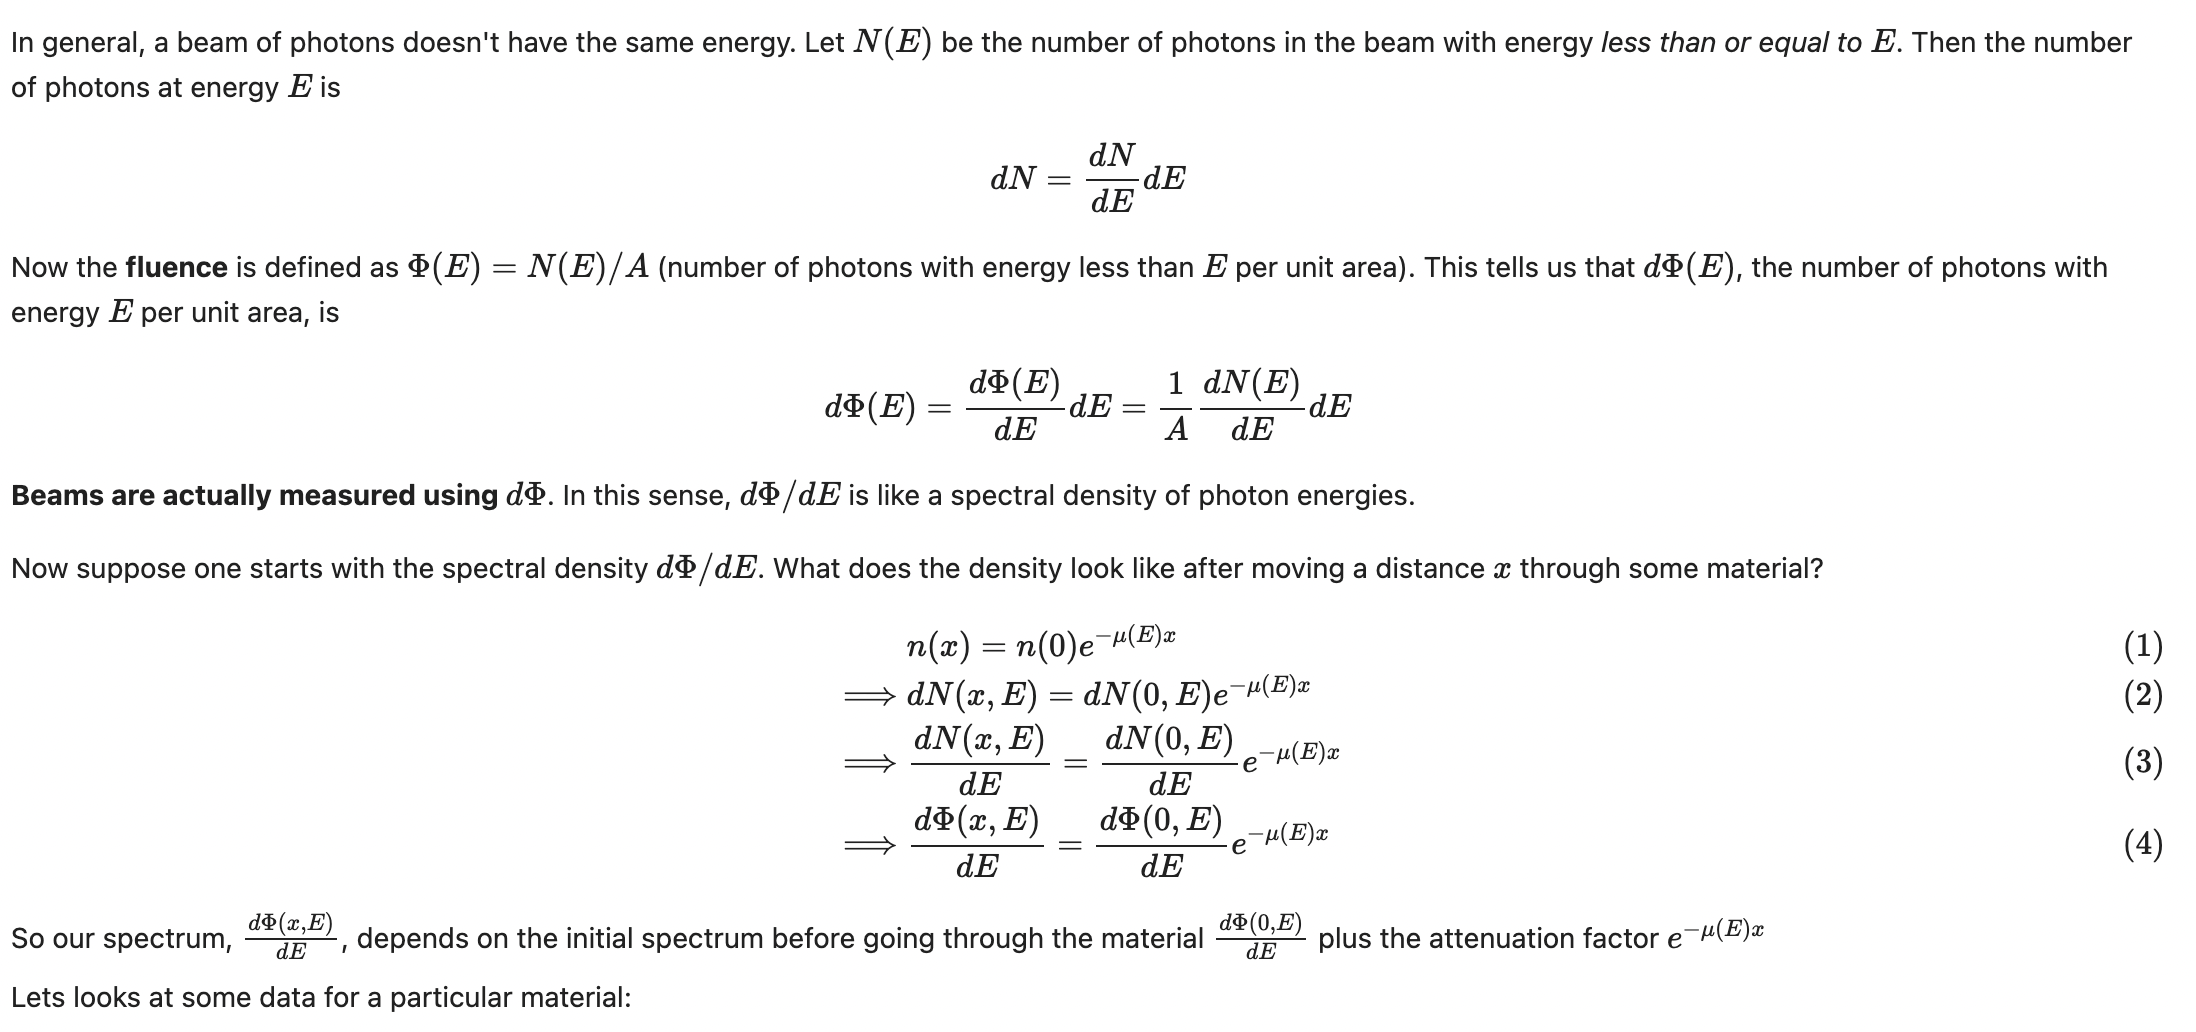

In [12]:
E_data = np.array([ 0.1  ,  0.2  ,  0.3  ,  0.4  ,  0.5  ,  0.55 ,  0.662,  0.8  ,
        1.   ,  1.25 ,  1.5  ,  2.   ,  3.   ,  4.   ,  5.   ,  6.   ,
        8.   , 10.   ]) # MeV

mu_data = np.array([0.04999041, 0.04277302, 0.03549048, 0.03178857, 0.02901388,
       0.02782302, 0.02567083, 0.02357278, 0.02118703, 0.01894664,
       0.01723952, 0.01476657, 0.01176935, 0.00999207, 0.00880421,
       0.00793411, 0.00679437, 0.0061037 ]) # attenuation coffecient

dPhidE0_data = np.array([0.   , 0.032, 0.06 , 0.086, 0.109, 0.131, 0.151, 0.185, 0.212,
       0.238, 0.257, 0.274, 0.256, 0.205, 0.147, 0.096, 0.029, 0.002])  # differention

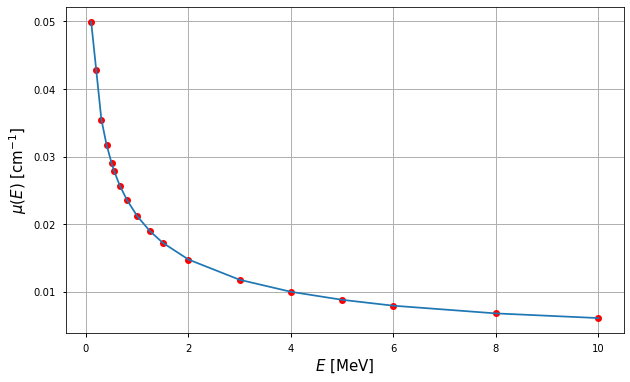

In [18]:
# Plot μ(E) for this material
plt.figure(figsize=(10,6))
plt.plot(E_data, mu_data, 'ro')
plt.plot(E_data, mu_data)
plt.xlabel('$E$ [MeV]', fontsize=15)
plt.ylabel('$\mu(E)$ [cm$^{-1}$]', fontsize=15)
plt.grid()
plt.show()
# Property of Material 

__Here, we observe that with decreasing μ(E) the number of photons getting passed are increasing__
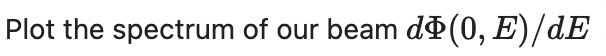

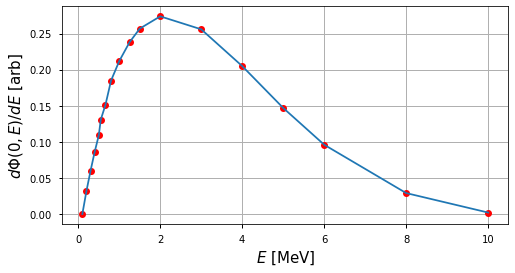

In [19]:
# Energy Distribution
plt.figure(figsize=(8,4))
plt.plot(E_data, dPhidE0_data, 'ro')
plt.plot(E_data, dPhidE0_data)
plt.xlabel('$E$ [MeV]', fontsize=15)
plt.ylabel('$d\Phi(0,E)/dE$ [arb]', fontsize=15)
plt.grid()
plt.show()
# Property of BEAM

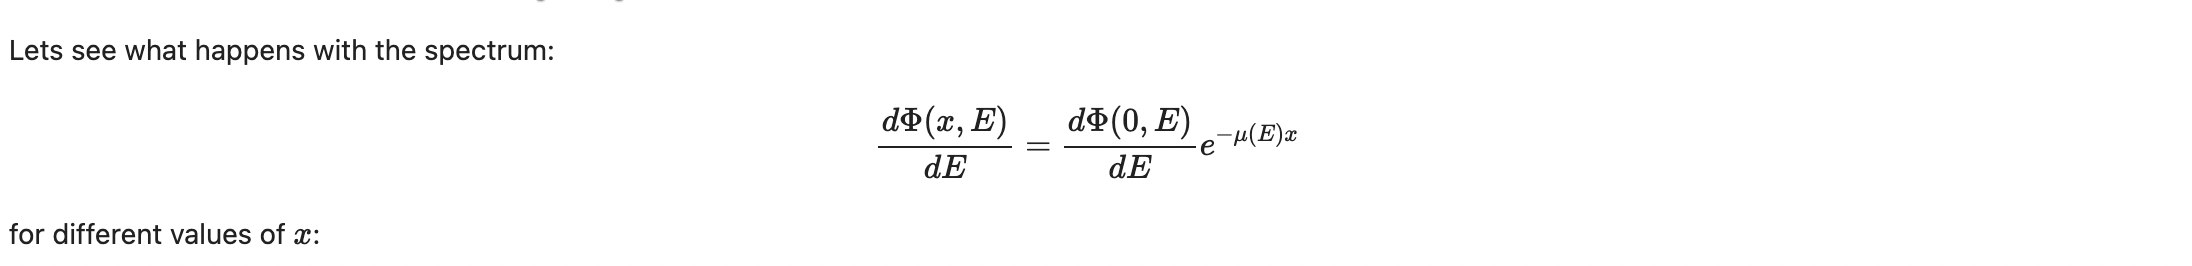
__THAT IS WIDTH OF THE MATERIAL__

In [20]:
#Defining the above expression for x = [5,10,20,40,100]
dPhidE5_data = dPhidE0_data*np.exp(-mu_data*5)
dPhidE10_data = dPhidE0_data*np.exp(-mu_data*10)
dPhidE20_data = dPhidE0_data*np.exp(-mu_data*20)
dPhidE40_data = dPhidE0_data*np.exp(-mu_data*40)
dPhidE100_data = dPhidE0_data*np.exp(-mu_data*100)

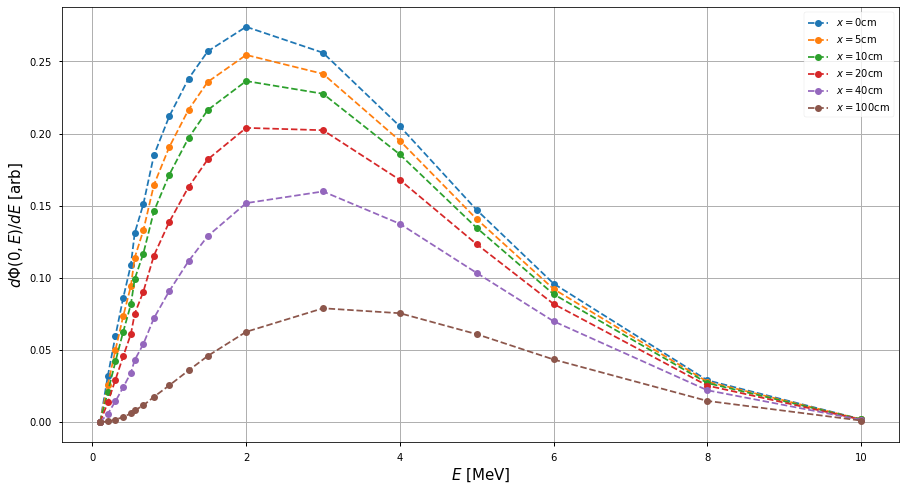

In [22]:
# Plot
plt.figure(figsize=(15,8))
plt.plot(E_data, dPhidE0_data, 'o--', label='$x=$0cm')
plt.plot(E_data, dPhidE5_data, 'o--', label='$x=$5cm')
plt.plot(E_data, dPhidE10_data, 'o--', label='$x=$10cm')
plt.plot(E_data, dPhidE20_data, 'o--', label='$x=$20cm')
plt.plot(E_data, dPhidE40_data, 'o--', label='$x=$40cm')
plt.plot(E_data, dPhidE100_data, 'o--', label='$x=$100cm')
plt.xlabel('$E$ [MeV]', fontsize=15)
plt.ylabel('$d\Phi(0,E)/dE$ [arb]', fontsize=15)
plt.grid()
plt.legend()
plt.show()

__Here, we can observe that most of the High Energy photons ar still going through the material.__  
**Hence,after the beam passes through it will contains more high energy photons as low one are already absorbed.**

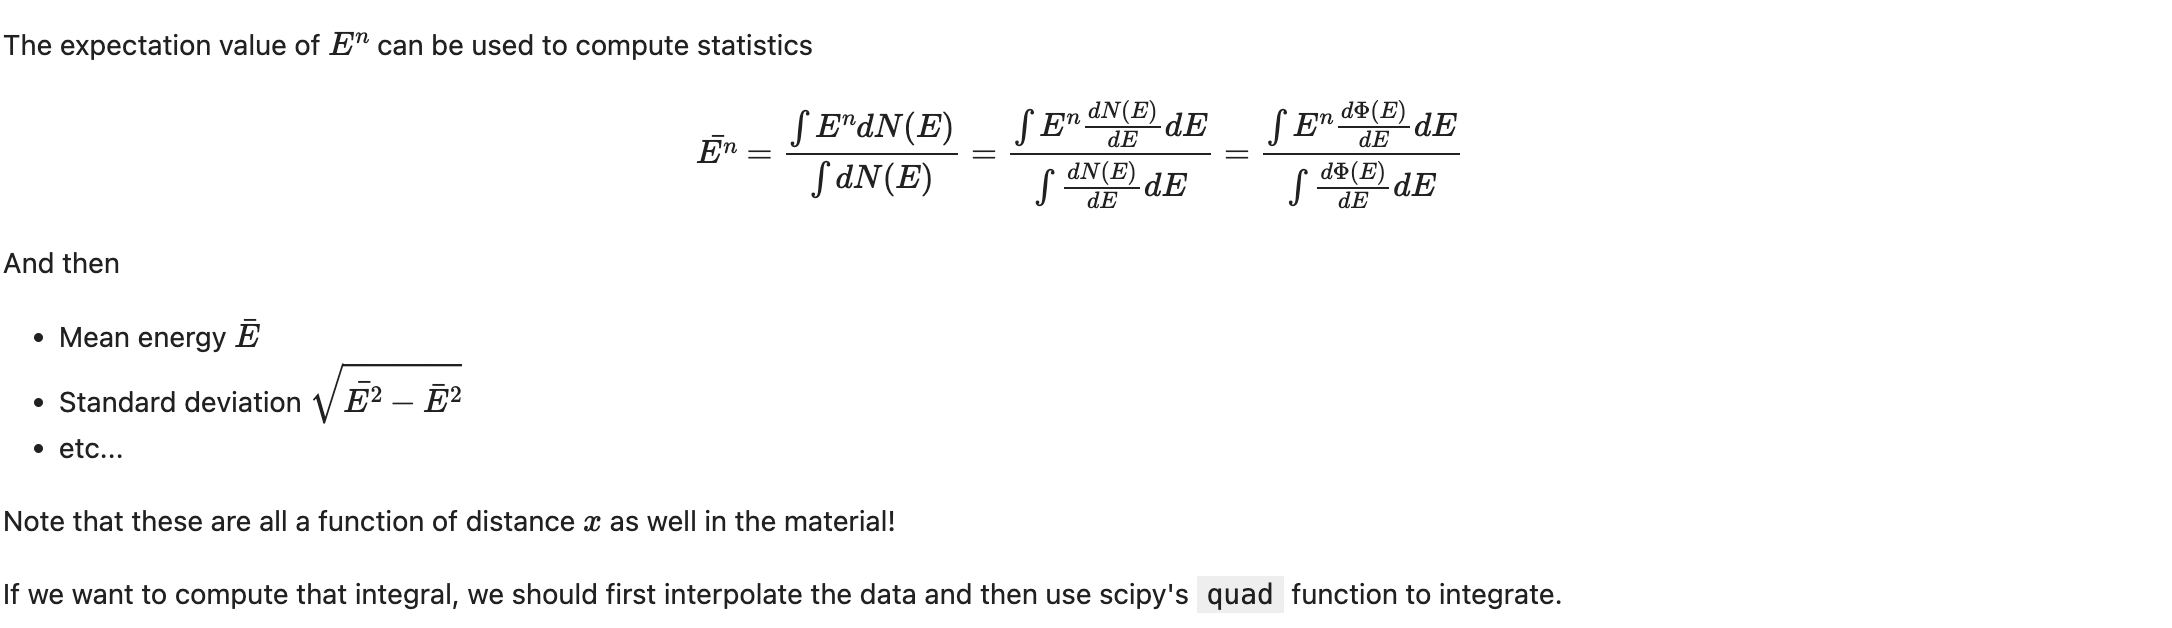

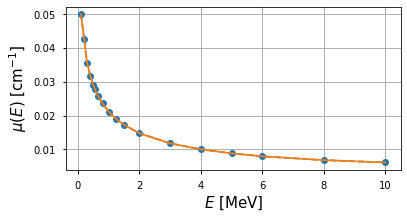

In [31]:
# Plot μ(E) for this material
plt.figure(figsize=(6,3))
plt.plot(E_data, mu_data, 'o--')
plt.plot(E_data, mu_data)
plt.xlabel('$E$ [MeV]', fontsize=15)
plt.ylabel('$\mu(E)$ [cm$^{-1}$]', fontsize=15)
plt.grid()
plt.show()
# Property of Material 

In [32]:
# The following mu function is defined for the above curve
mu_f = interp1d(E_data, mu_data, kind='cubic')
mu_f(6)
# we are solving for the initial conditions.

array(0.00793411)

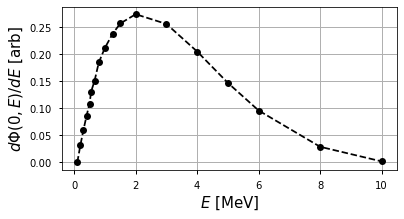

In [44]:
# Energy Distribution
plt.figure(figsize=(6,3))
plt.plot(E_data, dPhidE0_data, 'ko--')
plt.xlabel('$E$ [MeV]', fontsize=15)
plt.ylabel('$d\Phi(0,E)/dE$ [arb]', fontsize=15)
plt.grid()
plt.show()
# Property of BEAM

In [45]:
# This function is defined for the above graph
dPhidE0_f = interp1d(E_data, dPhidE0_data, kind='cubic')
dPhidE0_f(6)

array(0.096)

In [54]:
# Now we are going to use interpolation to make CURVES smooth and calculate every possible statestical data.
mu_f = interp1d(E_data, mu_data, kind='cubic')
dPhidE0_f = interp1d(E_data, dPhidE0_data, kind='cubic')
E_cont = np.linspace(min(E_data), max(E_data), 150)
mu_cont = mu_f(E_cont)
dPhidE0_cont = dPhidE0_f(E_cont)

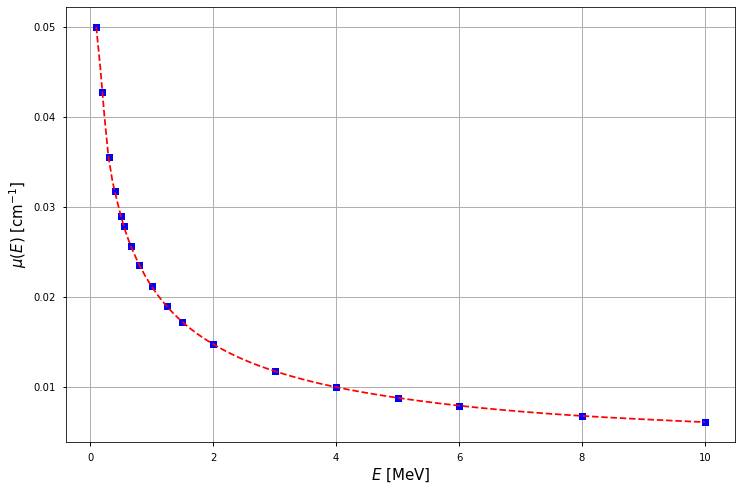

In [55]:
# let's make both of the smooth
plt.figure(figsize=(12,8))
plt.plot(E_data, mu_data, 'bs')
plt.plot(E_cont, mu_cont, 'r--')
plt.xlabel('$E$ [MeV]', fontsize=15)
plt.ylabel('$\mu(E)$ [cm$^{-1}$]', fontsize=15)
plt.grid()
plt.show()

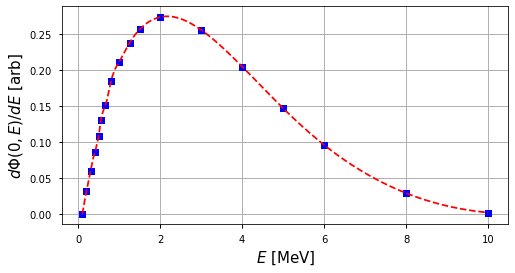

In [56]:
plt.figure(figsize=(8,4))
plt.plot(E_data, dPhidE0_data, 'bs')
plt.plot(E_cont, dPhidE0_cont, 'r--')
plt.xlabel('$E$ [MeV]', fontsize=15)
plt.ylabel('$d\Phi(0,E)/dE$ [arb]', fontsize=15)
plt.grid()
plt.show()

__Again, doing the same operations with the smooth CURVES__
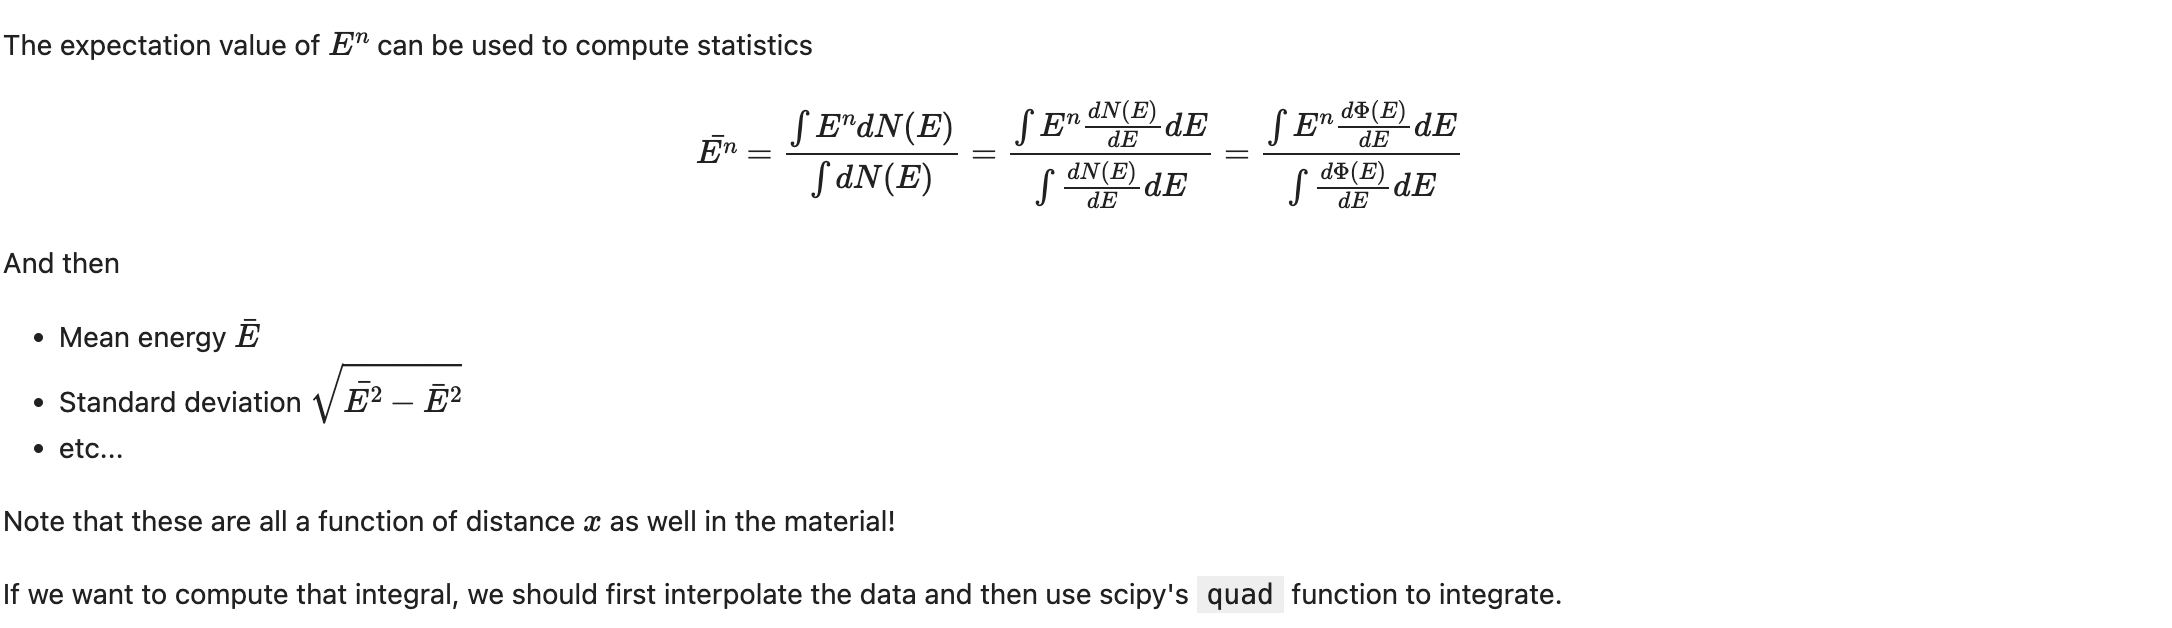

In [59]:
# Passed beam
def get_En(x, n):
    numerator = quad(lambda E: E**n *dPhidE0_f(E)*np.exp(-mu_f(E) * x),
                     min(E_data), max(E_data))[0]
    denominator = quad(lambda E: dPhidE0_f(E)*np.exp(-mu_f(E) * x),
                     min(E_data), max(E_data))[0]
    return numerator/denominator

def get_std(x):
    return np.sqrt(get_En(x,2)-get_En(x,1)**2)

In [62]:
# Get some data for the mean energy and standard deviation of energy for different values of x (width of absorber)
x = np.linspace(0,100,100)
mean_energy = np.vectorize(get_En)(x, 1)
stddev_energy = np.vectorize(get_std)(x)

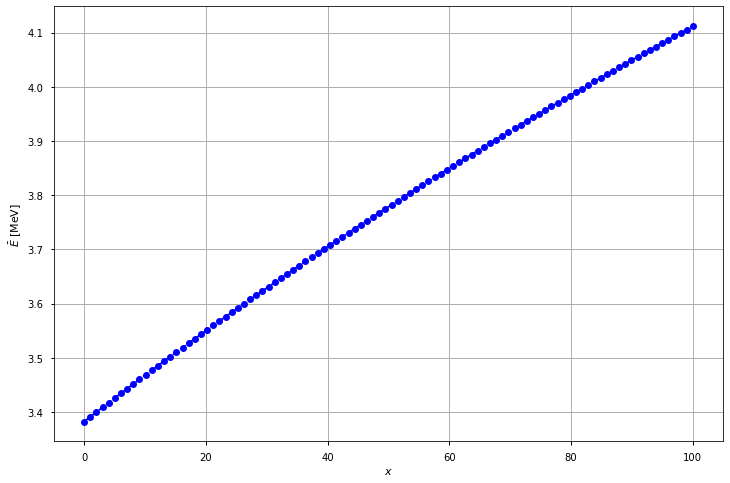

In [78]:
# Plot
plt.figure(figsize=(12,8))
plt.plot(x, mean_energy,'bo--')
plt.ylabel(r'$\bar{E}$ [MeV]')
plt.xlabel('$x$')
plt.grid()
# The mean energy will increase as more high energy photons will be there out of the material.

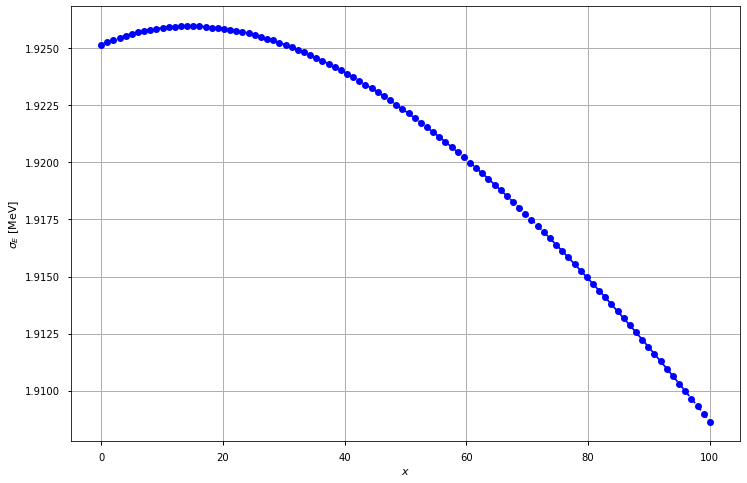

In [79]:
# Standard Deviation wich first increases and the decreases drastically.
plt.figure(figsize=(12,8))
plt.plot(x, stddev_energy,'bo--')
plt.ylabel(r'$\sigma_E$ [MeV]')
plt.xlabel('$x$')
plt.grid()